In [1]:
# pandas and numpy are used for data manipulation 
import pandas as pd 
import numpy as np 
# matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt 
import seaborn 
# fix_yahoo_finance is used to fetch data 
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


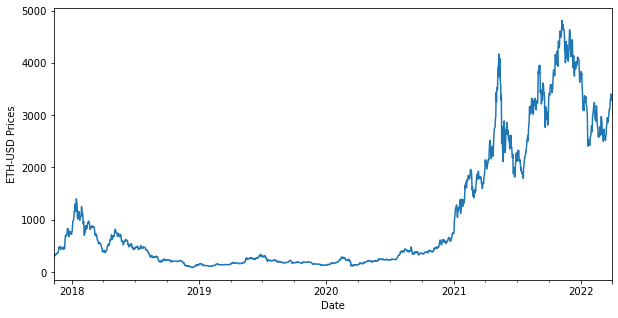

In [2]:
# Read data 
Df = yf.download('ETH-USD','2016-01-01','2022-03-31')
# Only keep close columns 
#Df=Df[['Close']] 
# Drop rows with missing values 
Df= Df.dropna() 
# Plot the closing price of GLD 
Df.Close.plot(figsize=(10,5)) 
plt.ylabel("ETH-USD Prices")
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
Df["Diff"] = Df.Close.diff()

In [4]:
Df.tail()

,Open,High,Low,Close,Adj Close,Volume,Diff
Date,,,,,,,
2022-03-27,3143.795654,3291.577637,3129.997803,3291.577637,3291.577637,13431866834,148.398682
2022-03-28,3292.322510,3424.019287,3279.027100,3336.634521,3336.634521,20620450770,45.056885
2022-03-29,3335.021240,3470.186279,3335.021240,3401.987793,3401.987793,19533323636,65.353271
2022-03-30,3401.526123,3435.286133,3349.237061,3385.157959,3385.157959,15302506131,-16.829834
2022-03-31,3385.289307,3435.128418,3272.934570,3281.642822,3281.642822,17685495686,-103.515137


In [5]:
Df["Volatility"] = Df.Close.rolling(2).mean()
Df["Force_Index"] = Df["Close"] * Df["Volume"]

In [6]:
Df["y"] = Df["Diff"].apply(lambda x: 1 if x > 0 else 0).shift(-1)

In [7]:
Df = Df.drop(
   ["Open", "High", "Low", "Close", "Volume", "Diff", "Adj Close"],
   axis=1,
).dropna()

In [8]:
Df

,Volatility,Force_Index,y
Date,,,
2017-11-10,310.068497,2.651340e+11,1.0
2017-11-11,306.966995,2.650561e+11,0.0
2017-11-12,311.294495,4.968034e+11,1.0
2017-11-13,312.311996,3.299832e+11,1.0
2017-11-14,327.173508,3.611571e+11,0.0
...,...,...,...
2022-03-26,3124.925171,2.790018e+13,1.0
2022-03-27,3217.378296,4.421203e+13,1.0
2022-03-28,3314.106079,6.880291e+13,1.0


In [9]:
X = Df.drop(["y"], axis=1).values
y = Df["y"].values

In [10]:
y

array([1., 0., 1., ..., 1., 0., 0.])

# KNN CLF

In [52]:
from timeit import default_timer as timer

start = timer()

X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size=0.33,
   shuffle=False,
)
knn = KNeighborsClassifier()
knn.fit(
   X_train,
   y_train,
)

knn_pred = knn.predict(X_test)
print('accuracy score of KNN Classification %3f' % (accuracy_score(y_test, knn_pred)))

end = timer()

print('time required to run',end-start)

accuracy score of KNN Classification 0.534972
time required to run 0.03416319999996631


In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
knn_auc = roc_auc_score(y_test,knn_pred)
print('KNN: ROC AUC=%.3f' % (knn_auc))

KNN: ROC AUC=0.493


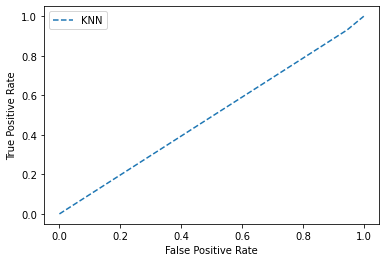

In [13]:
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_pred)
plt.plot(knn_fpr, knn_tpr, linestyle='--', label = 'KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# random Forest classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
from timeit import default_timer as timer

start = timer()

clf = RandomForestClassifier()
clf.fit(
   X_train,
   y_train,
)
rf_pred = clf.predict(X_test)


print('accuracy score of Ranfom Forest Classification %3f' % (accuracy_score(y_test, rf_pred)))


end = timer()

print('time required',end-start)

accuracy score of Ranfom Forest Classification 0.476371
time required 0.271232100000816


In [16]:
#ROC AUC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test,rf_pred)
print('Random Forest clf: ROC AUC=%.3f' % (rf_auc))

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred)

Random Forest clf: ROC AUC=0.509


# naive bayes

In [17]:
from sklearn.naive_bayes import BernoulliNB


In [18]:
from timeit import default_timer as timer

start = timer()

clf = BernoulliNB()
clf.fit(
   X_train,
   y_train,
)
NB_pred = clf.predict(X_test)


print('accuracy score of Naive bayes clf ',accuracy_score(y_test, NB_pred))


end = timer()

print('time required',end-start)

accuracy score of Naive bayes clf  0.5482041587901701
time required 0.004502199999999235


In [19]:
NB_auc = roc_auc_score(y_test,NB_pred)
print('Naive Bayes clf: ROC AUC=%.3f' % (NB_auc))

NB_fpr, NB_tpr, _ = roc_curve(y_test, NB_pred)

Naive Bayes clf: ROC AUC=0.500


# SVM

In [20]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [21]:
start = timer()


clf = make_pipeline(StandardScaler(), SVC(gamma="auto"))
clf.fit(
   X_train,
   y_train,
)
svm_pred = clf.predict(X_test)
print(accuracy_score(y_test, svm_pred))


end = timer()

print('time required',end-start)

0.45368620037807184
time required 0.14530949999999976


In [22]:
svm_auc = roc_auc_score(y_test,svm_pred)
print('Support Vector Machine: ROC AUC=%.3f' % (svm_auc))

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_pred)

Support Vector Machine: ROC AUC=0.494


# logistic regression


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
start = timer()


clf = LogisticRegression()

clf.fit(
   X_train,
   y_train,
)
lreg_pred = clf.predict(X_test)
print(accuracy_score(y_test, lreg_pred))


end = timer()

print('time required',end-start)

0.5482041587901701
time required 0.01597770000000054


In [25]:
lreg_auc = roc_auc_score(y_test,lreg_pred)
print('Support Vector Machine: ROC AUC=%.3f' % (lreg_auc))

lreg_fpr, lreg_tpr, _ = roc_curve(y_test, lreg_pred)

Support Vector Machine: ROC AUC=0.500


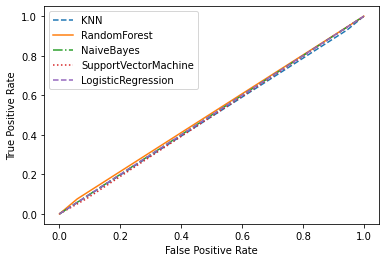

In [26]:
plt.plot(knn_fpr, knn_tpr, linestyle='--', label = 'KNN')
plt.plot(rf_fpr, rf_tpr, linestyle='solid', label = 'RandomForest')
plt.plot(NB_fpr, NB_tpr, linestyle='dashdot', label = 'NaiveBayes')
plt.plot(svm_fpr, svm_tpr, linestyle=':', label = 'SupportVectorMachine')
plt.plot(lreg_fpr, lreg_tpr, linestyle='dashed', label = 'LogisticRegression')


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

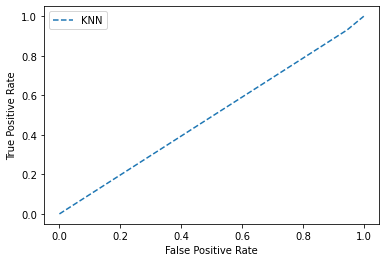

In [27]:
plt.plot(knn_fpr, knn_tpr, linestyle='--', label = 'KNN')



# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

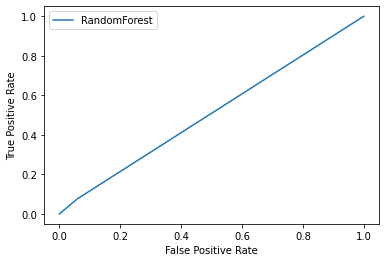

In [28]:

plt.plot(rf_fpr, rf_tpr, linestyle='solid', label = 'RandomForest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

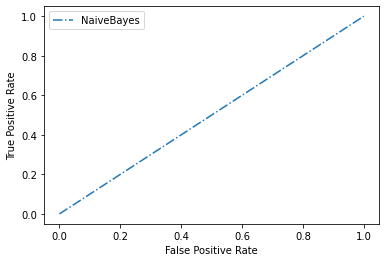

In [29]:

plt.plot(NB_fpr, NB_tpr, linestyle='dashdot', label = 'NaiveBayes')


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

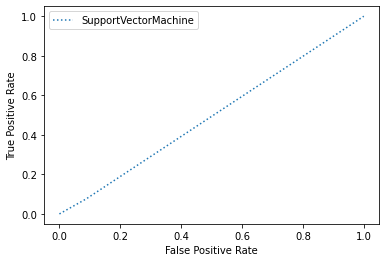

In [30]:

plt.plot(svm_fpr, svm_tpr, linestyle=':', label = 'SupportVectorMachine')


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

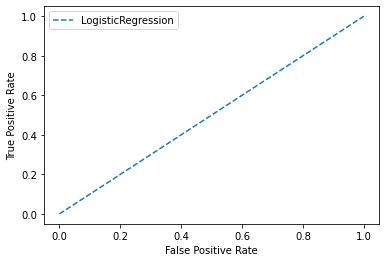

In [31]:

plt.plot(lreg_fpr, lreg_tpr, linestyle='dashed', label = 'LogisticRegression')


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [32]:
target = ['Price moving down','Price moving up']

from sklearn.metrics import confusion_matrix, classification_report
print('KNN classification report')
print(classification_report(y_test, knn_pred,target_names = target))

KNN classification report
                   precision    recall  f1-score   support

Price moving down       0.39      0.05      0.10       239
  Price moving up       0.54      0.93      0.69       290

         accuracy                           0.53       529
        macro avg       0.47      0.49      0.39       529
     weighted avg       0.48      0.53      0.42       529



In [33]:

print('Random forest classification report')
print(classification_report(y_test, rf_pred,target_names = target))

Random forest classification report
                   precision    recall  f1-score   support

Price moving down       0.46      0.94      0.61       239
  Price moving up       0.61      0.08      0.13       290

         accuracy                           0.47       529
        macro avg       0.53      0.51      0.37       529
     weighted avg       0.54      0.47      0.35       529



In [34]:
print('Naive Bayes classification report')
print(classification_report(y_test, NB_pred,labels=np.unique(NB_pred)))

Naive Bayes classification report
              precision    recall  f1-score   support

         1.0       0.55      1.00      0.71       290

   micro avg       0.55      1.00      0.71       290
   macro avg       0.55      1.00      0.71       290
weighted avg       0.55      1.00      0.71       290



In [35]:
print('SVM classification report')
print(classification_report(y_test, svm_pred, target_names = target))

SVM classification report
                   precision    recall  f1-score   support

Price moving down       0.45      0.91      0.60       239
  Price moving up       0.51      0.08      0.13       290

         accuracy                           0.45       529
        macro avg       0.48      0.49      0.37       529
     weighted avg       0.48      0.45      0.34       529



In [36]:
print('Logistic Regression classification report')
print(classification_report(y_test, lreg_pred, labels=np.unique(NB_pred)))

Logistic Regression classification report
              precision    recall  f1-score   support

         1.0       0.55      1.00      0.71       290

   micro avg       0.55      1.00      0.71       290
   macro avg       0.55      1.00      0.71       290
weighted avg       0.55      1.00      0.71       290



In [44]:
confusion_matrix(y_test, svm_pred)

array([[218,  21],
       [268,  22]], dtype=int64)

In [45]:
confusion_matrix(y_test, lreg_pred)

array([[  0, 239],
       [  0, 290]], dtype=int64)

In [46]:
confusion_matrix(y_test, NB_pred)

array([[  0, 239],
       [  0, 290]], dtype=int64)

In [47]:
confusion_matrix(y_test, rf_pred)

array([[225,  14],
       [268,  22]], dtype=int64)

In [48]:
confusion_matrix(y_test, knn_pred)

array([[ 13, 226],
       [ 20, 270]], dtype=int64)